# Реалізація кластеризації методом k-середніх

## Імпорт бібліотек та ознайомлення з набором даних

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
features = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

In [3]:
iris_df = iris_df.dropna(subset=features)

Кроки для реалізації кластеризації методом k-середніх:
1. Масштабування даних
2. Ініціалізація випадкових центроїд
3. Позначення кожної точки даних
4. Оновлення центроїдів
5. Повторення кроків 3 і 4, поки центроїди перестануть змінюватися

## 1. Масштабування даних

In [4]:
iris_df = (iris_df - iris_df.min()) / (iris_df.max() - iris_df.min()) * 9 + 1

In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,4.858333,4.965000,5.207119,5.122500
std,2.070165,1.634499,2.692828,2.858391
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,1.915254,1.750000
50%,4.750000,4.750000,6.110169,5.500000
75%,6.250000,5.875000,7.254237,7.375000
max,10.000000,10.000000,10.000000,10.000000


In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,3.00,6.625,1.610169,1.375
1,2.50,4.750,1.610169,1.375
2,2.00,5.500,1.457627,1.375
3,1.75,5.125,1.762712,1.375
4,2.75,7.000,1.610169,1.375


## 2. Ініціалізація випадкових центроїд

In [7]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample().iloc[0]))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [8]:
centroids = random_centroids(iris_df, 4)
centroids

,0,1,2,3
sepal length (cm),1.250000,4.750000,1.500000,4.250000
sepal width (cm),4.750000,4.375000,5.125000,3.250000
petal length (cm),4.508475,7.254237,8.779661,1.457627
petal width (cm),5.125000,5.500000,9.250000,1.375000


## 3. Позначення кожної точки даних

In [9]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [10]:
labels = get_labels(iris_df, centroids)
labels.value_counts()

1    93
3    50
0     4
2     3
Name: count, dtype: int64

## 4. Оновлення центроїд

In [11]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

## 5. Повторення кроків 3 і 4, поки центроїди перестануть змінюватися

### Імпорт необхідних бібліотек та функція для відображення кластерів

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [13]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)

    clear_output()
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], c='r')
    plt.show()

### Реалізація кроку №5

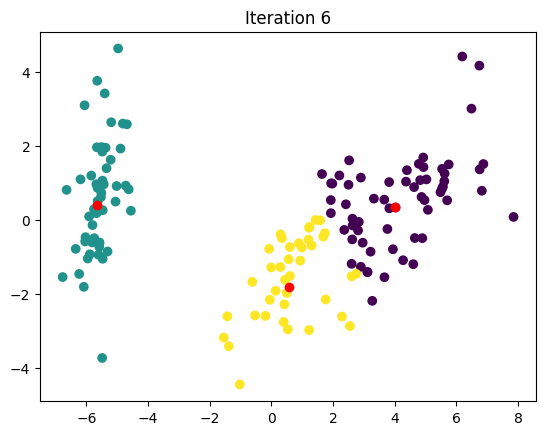

In [14]:
max_iterations = 100
k = 3

centroids = random_centroids(iris_df, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(iris_df, centroids)
    centroids = new_centroids(iris_df, labels, k)
    plot_clusters(iris_df, labels, centroids, iteration)
    iteration += 1

## Аналіз отриманих даних

In [15]:
centroids

,0,1,2
sepal length (cm),6.653880,2.613660,4.406264
sepal width (cm),4.714525,6.181958,3.218262
petal length (cm),7.627264,1.683939,5.776541
petal width (cm),7.778481,1.503844,5.361460


In [16]:
labels.value_counts()

0    61
1    50
2    39
Name: count, dtype: int64

In [17]:
# Справжні мітки та кластери
iris_df['true_label'] = iris.target
iris_df['cluster'] = labels.values

# Матрицю відповідності
ct = pd.crosstab(iris_df['true_label'], iris_df['cluster'])

print("Матриця відповідності кластерів до справжніх класів:")
print(ct)

# Словник відповідностей: який кластер найбільше відповідає якому класу
mapping = ct.idxmax(axis=0).to_dict()

print("\nВідповідність кластерів до справжніх класів:")
for cluster, true_class in mapping.items():
    print(f"Кластер {cluster} ≈ Клас {true_class} ({iris.target_names[true_class]})")

Матриця відповідності кластерів до справжніх класів:
cluster      0   1   2
true_label            
0            0  50   0
1           14   0  36
2           47   0   3

Відповідність кластерів до справжніх класів:
Кластер 0 ≈ Клас 2 (virginica)
Кластер 1 ≈ Клас 0 (setosa)
Кластер 2 ≈ Клас 1 (versicolor)


In [18]:
from sklearn.metrics import accuracy_score

# Список передбачених "класів" на основі кластера і відповідності
predicted_labels = iris_df['cluster'].map(mapping)

# Обчислення точності
accuracy = accuracy_score(iris_df['true_label'], predicted_labels)
print(f"\nТочність кластеризації: {accuracy:.2%}")


Точність кластеризації: 88.67%


# Висновки

У цьому дослідженні було реалізовано алгоритм кластеризації методом k-середніх (k-means) з нуля на основі класичного набору даних Iris. Метод дозволив розбити дані на 3 кластери без використання реальних міток класів, що демонструє його здатність виявляти приховану структуру в даних.

## Принцип роботи методу k-середніх

Алгоритм k-середніх працює за наступною ідеєю:
1. Вибирається кількість кластерів k (у нашому випадку — 3).
2. Випадковим чином ініціалізуються k центроїдів.
3. Кожна точка даних приписується до найближчого центроїда (за відстанню).
4. Центроїди оновлюються — для кожного кластера обчислюється новий центр (середнє значення точок у кластері).
5. Кроки 3–4 повторюються, поки центроїди не перестануть змінюватися або досягнуто максимальну кількість ітерацій.

Цей метод є ітеративним і евристичним, що означає, що результат може залежати від початкових значень.

## Для чого застосовується кластеризація методом k-середніх?

Метод k-середніх належить до неконтрольованого навчання, тобто працює без наявності відомих міток класів. Він використовується для:
- Виявлення структури в даних (групування схожих об’єктів),
- Попереднього аналізу даних,
- Компресії даних (наприклад, зменшення кількості кольорів в зображенні),

Як приклад використання на практиці, можна навести сегментацію клієнтів або товарів у бізнес-аналітиці.

## Аналіз результатів на даних Iris

- Алгоритм розділив дані на 3 кластери, що відповідає кількості реальних видів ірису.
- Була побудована матриця відповідності кластерів до реальних класів, яка показала, що один з кластерів майже точно відповідає виду Iris-setosa, а інші два — частково перекриваються між versicolor та virginica.
- Обчислена точність кластеризації склала трошки менше 90%, що є дуже хорошим результатом для методу без учителя.

## Висновок

Метод k-середніх показав високу ефективність у кластеризації даних без попереднього навчання. Незважаючи на простоту, він дозволяє виявити приховану структуру в наборі даних і може бути корисним інструментом для первинної обробки в аналізі у реальних проєктах.